In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [359]:
SUITS  = ['♣', '♦', '♥', '♠']
FACES  = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
VALUES = [ 1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 ,  10,  10,  10]


class Card:
    def __init__(self, suit, face, value):
        self.suit = suit
        self.face = face
        self.display = face+suit
        self.value = value

class Deck_Of_Cards:
    def __init__(self):
        self.deck = []
        self.create_deck()

    def create_deck(self):
        for i in range(6):
            for suit in SUITS:
                for index in range(len(FACES)):
                    self.deck.append(Card(suit, FACES[index], VALUES[index]))
    
    def draw_a_card(self):
        card = np.random.choice(self.deck)
        self.deck.remove(card)
        return card

In [357]:
deck = Deck_Of_Cards()

In [360]:
class Player:

    def __init__(self):
        self.cards_set1 = []
        self.faces_set1 = []
        self.values_set1 = []
        self.display_cards_set1 = []
        self.tot_value_set1 = 0
        self.ace_count_set1 = 0

        self.cards_set2 = []
        self.faces_set2 = []
        self.values_set2 = []
        self.display_cards_set2 = []
        self.tot_value_set2 = 0
        self.ace_count_set2 = 0

    def receive_card(self, card):
        if card.face == 'A' and (self.tot_value_set1 + card.value <= 21):
            self.tot_value_set1 += 11
            self.values_set1.append(11)
        else:
            self.tot_value_set1 += card.value
            self.values_set1.append(card.value)
            
        self.cards_set1.append(card)
        self.faces_set1.append(card.face)
        self.display_cards_set1.append(card.display)

    def check_blackjack(self):
        if (len(self.cards) == 2) and ('A' in self.faces):
            return True
        return False
    
    def split_hand(self):
        if self.faces_set1[0] == 'A' and self.faces_set1[1] == 'A':
            self.

    
    def show_value(self):
        return self.tot_value
    
    def show_cards(self):
        return self.display_cards
    


In [228]:
def blackjack():

    Deck = Deck_Of_Cards()
    banker = Player()
    player = Player()

    # Drawing of cards
    while len(banker.cards) < 2:
        # Card is given to the player
        player.receive_card(Deck.draw_a_card())    
        # Card is given to the banker 
        banker.receive_card(Deck.draw_a_card())

    # Checks if player or banker has a blackjack
    if player.check_blackjack() == True and banker.check_blackjack() == True:
        print('Both you and the banker scored a Blackjack! This round ends with a tie.')
        return 
    elif player.check_blackjack() == True and banker.check_blackjack() != True:
        print('You scored a blackjack! You win this round!')
        return 
    elif player.check_blackjack() != True and banker.check_blackjack() == True:
        print('Banker scored a blackjack. You lose this round.')
        return
    
    # Player draws card
    players_turn = True
    while players_turn and player.show_value() < 22:
        print("\n")
        print(f'Banker has: {banker.display_cards[0]}')
        print(f'You have: {player.show_cards()}')
        print(f'Value: {player.show_value()}')

        player_choice = input("What do you want to do? Type 'hit' or 'stay':")
        if player_choice.lower() not in ['hit', 'stay']:
            player_choice = input("Please type a valid input, 'hit' or 'stay'")
        if player_choice == 'hit':
            card = Deck.draw_a_card()
            player.receive_card(card)
            print(f"You received {card.display}")
        else:
            players_turn = False

    if player.tot_value > 21:
        print('\n')
        print(f'You have: {player.show_cards()}')
        print(f'Value: {player.show_value()}')
        print('You lose!')
        return

    print(f"Banker has {banker.show_cards()}")
    print(f"Banker's Value: {banker.show_value()}")
    while banker.show_value() < 17:
        card = Deck.draw_a_card()
        banker.receive_card(card)
        print(f"Banker received {card.display}")

    if (banker.show_value() > 21) or (banker.show_value() < player.show_value()):
        print(f"You win!")
    elif banker.show_value() > player.show_value():
        print(f"You lose!")
    else:
        print(f'You tie!')

In [242]:
blackjack()



Banker has: 2♣
You have: ['K♥', 'Q♠']
Value: 20
Banker has ['2♣', 'K♣']
Banker's Value: 12
Banker received 2♠
Banker received 10♣
You win!


In [320]:
def blackjack_automated(bet):

    Deck = Deck_Of_Cards()
    banker = Player()
    player = Player()

    # Drawing of cards
    while len(banker.cards) < 2:
        # Card is given to the player
        player.receive_card(Deck.draw_a_card())    
        # Card is given to the banker 
        banker.receive_card(Deck.draw_a_card())

    # Checks if player or banker has a blackjack
    if player.check_blackjack() == True and banker.check_blackjack() == True:
        return 'Tie', 0
    elif player.check_blackjack() == True and banker.check_blackjack() != True:
        return 'Blackjack Win', int(bet*1.5)
    elif player.check_blackjack() != True and banker.check_blackjack() == True:
        return 'Lose', -bet
    
    # Player Strategy
    while player.show_value() < 17:
        card = Deck.draw_a_card()
        player.receive_card(card)

    if player.tot_value > 21:
        return 'Lose', -bet

    while banker.show_value() < 17:
        card = Deck.draw_a_card()
        banker.receive_card(card)

    if (banker.show_value() > 21) or (banker.show_value() < player.show_value()):
        return 'Win', bet
    elif banker.show_value() > player.show_value():
        return 'Lose', -bet
    else:
        return 'Tie', 0

In [321]:
blackjack_automated(50)

('Blackjack Win', 75)

In [355]:
class One_Simulation:

    def __init__(self):
        self.player_capital = 0
        self.player_status_log = []
        self.player_trend_log = []
        self.simulate_100_rounds()

    def simulate_100_rounds(self):
        for i in range(100):
            result = blackjack_automated(50)
            self.player_capital += result[1]
            self.player_status_log.append(result[0])
            self.player_trend_log.append(self.player_capital)


In [352]:
player_money = []

for i in range(1000):
    simulation = One_Simulation()
    player_money.append(simulation.player_capital)

<AxesSubplot:ylabel='Frequency'>

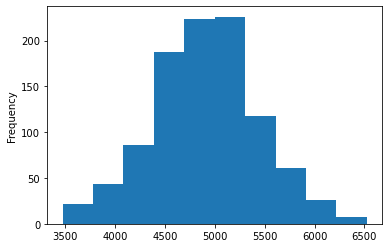

In [353]:
pd.Series(player_money).plot(kind='hist')

In [354]:
pd.Series(player_money).mean()

4905.7

<AxesSubplot:>

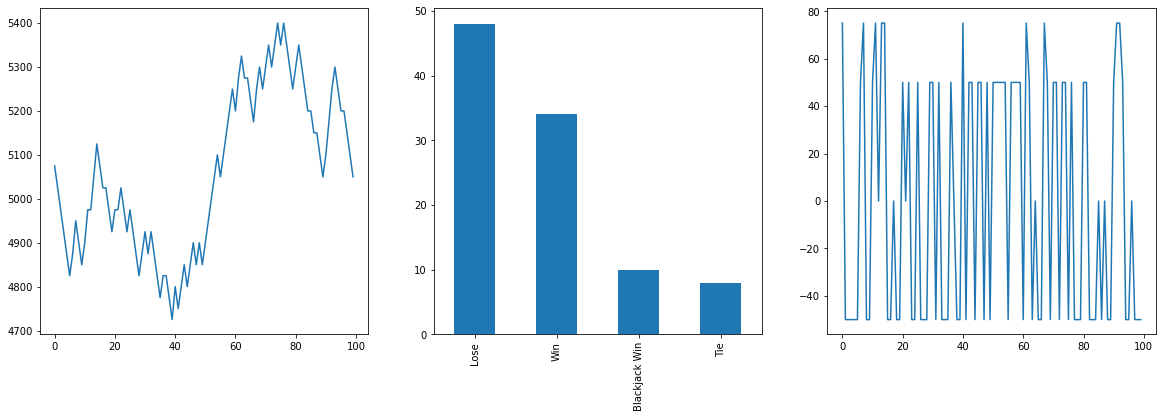

In [285]:
# For single simulation plotting purposes

# fig, ax = plt.subplots(1, 3)
# fig.set_size_inches(20, 6)

# pd.Series(player_trend_log).plot(ax=ax.flatten()[0])
# pd.Series(player_status_log).value_counts().plot(kind='bar', ax=ax.flatten()[1])
# pd.Series(player_winnings_log).plot(ax=ax.flatten()[2])